In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# read the csv file into a pandas DataFrame
ross_df = pd.read_csv('resources/CleanTrain_merged.csv')
ross_df

,Store,DayOfWeek,Date,month,year,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
0,1,5,7/31/2015,7,2015,5263,555,1,1,0,1,1270.0,9,2008,0
1,1,4,7/30/2015,7,2015,5020,546,1,1,0,1,1270.0,9,2008,0
2,1,3,7/29/2015,7,2015,4782,523,1,1,0,1,1270.0,9,2008,0
3,1,2,7/28/2015,7,2015,5011,560,1,1,0,1,1270.0,9,2008,0
4,1,1,7/27/2015,7,2015,6102,612,1,1,0,1,1270.0,9,2008,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,1/5/2013,1,2013,4771,339,1,0,0,1,5350.0,9,2013,1
1017205,1115,5,1/4/2013,1,2013,4540,326,1,0,0,1,5350.0,9,2013,1
1017206,1115,4,1/3/2013,1,2013,4297,300,1,0,0,1,5350.0,9,2013,1
1017207,1115,3,1/2/2013,1,2013,3697,305,1,0,0,1,5350.0,9,2013,1


In [3]:
# convert 'CompetitionDistance' from float to integer
ross_df["CompetitionDistance"] = ross_df["CompetitionDistance"].astype(int)

In [4]:
# for loop and conditional statement to convert 'StateHoliday' string notation into array of integer proxies
# for reference:  (9)a = public holiday, (8)b = Easter holiday, (6)c = Christmas, 0 = None
StHoliday_prox = []

for x in range(len(ross_df)):
    if ross_df["StateHoliday"][x] == "a":
        StHoliday_prox.append(9)
    elif ross_df["StateHoliday"][x] == "b":
        StHoliday_prox.append(8)
    elif ross_df["StateHoliday"][x] == "c":
        StHoliday_prox.append(6)
    else:
        StHoliday_prox.append(0)

In [5]:
# create new column based on integer proxies for 'StateHoliday'
ross_df["StHoliday_prox"] = StHoliday_prox

In [6]:
# export as csv for use elsewhere
ross_df.to_csv("resources/NewCleanTrain_merged.csv", index=False, header=True)

In [7]:
# assign the data to X and y
X = ross_df[["DayOfWeek", "month", "year", "Customers", "Open", "StHoliday_prox", "SchoolHoliday",
             "CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo", "Promo2"]]
y = ross_df["Sales"].values.reshape(-1, 1)

print(X.shape, y.shape)

(1017209, 12) (1017209, 1)


In [8]:
# use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
# create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [10]:
# fit the model to the training data and calculate the scores for the training and testing data
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8581174029420666
Testing Score: 0.8587322883691006


Text(0.5, 1.0, 'Residual Plot')

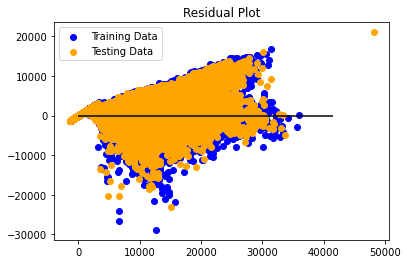

In [11]:
# plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [12]:
# use our model to make predictions
y_pred = model.predict(X_test)

In [13]:
# convert arrays to ordinary lists with the same items
y_predl = y_pred.tolist()
y_testl = y_test.tolist()

In [14]:
pred_df = pd.DataFrame({"Predictions": y_predl, "Actual": y_testl})

# clean up [] around column elements
pred_df["Predictions"] = pred_df["Predictions"].str[0]
pred_df["Actual"] = pred_df["Actual"].str[0]

pred_df.head()

,Predictions,Actual
0,8311.749866,8336
1,3068.160001,2193
2,4443.305001,5375
3,5441.308718,3911
4,5840.990686,5604


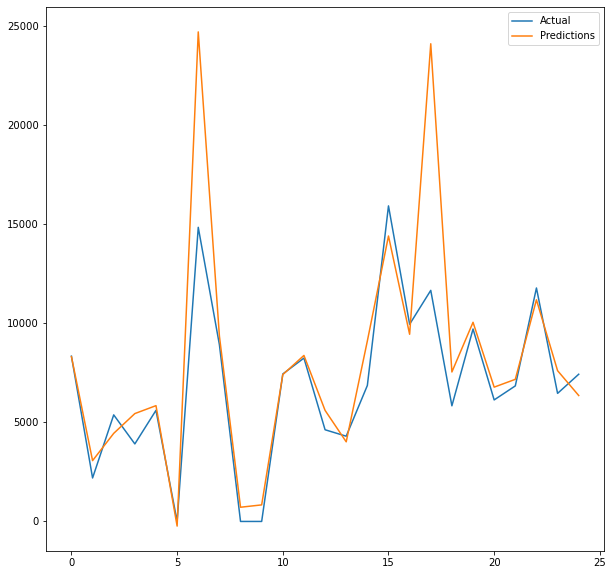

In [15]:
# plot the first 25 predictions vs actual sales
plt.figure(figsize=(10,10))
pred_df["Actual"][:25,].plot.line()
pred_df["Predictions"][:25,].plot.line()
plt.legend()
plt.show()

In [16]:
# print the coefficient and the intercept for the model
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-7.63760015e+01  3.43345280e+01  1.46962898e+02  6.19367051e+00
   1.39661608e+03 -9.16716344e+01  3.76757355e+01  3.03303550e-02
  -4.92876186e+00  1.98129599e+00  1.26625170e+03  2.48058259e+02]]
y-axis intercept:  [-299858.66308822]


In [17]:
# setup for predicting the dependent variable 'sales' with sklearn, for a hypothetical August 1, 2015
DayOfWeek = 6
month = 8
year = 2015
Customers = 560
Open = 1
StHoliday_prox = 0
SchoolHoliday = 1
CompetitionDistance = 1270
CompetitionOpenSinceMonth = 9
CompetitionOpenSinceYear = 2008
Promo = 0
Promo2 = 0

new_sales = model.predict([[DayOfWeek, month, year, Customers, Open, StHoliday_prox,
                            SchoolHoliday, CompetitionDistance, CompetitionOpenSinceMonth,
                            CompetitionOpenSinceYear, Promo, Promo2]])
new_sales

array([[4963.34601202]])